### Instructions

**Please download and import the dataset 'Nutrient Composition Dataset.csv' into Jupyter Notebook to attempt this quiz.**


**Problem Statment:**

HealthifyUs is a US-based startup company that gives nutrition advice to its customers to help them stay healthy and fit. They have collected data about various food items sold in the market along with their nutrient composition. The data contains information about the amount of the following nutrients in food items - Protein, Fat, Vitamin C, and Fibre. The food items can be segmented based on their nutrient composition so that suggestions can be provided based on the customer’s nutrition requirements.

 

**Attribute information:**

1. Protein: protein content in the food products
2. Fat: fat content in the food products
3. vitaminC: vitamin C content in the food products
4. Fibre: Fibre content in the food products
5. Product: Name of the food products
 

### Kindly go through these guidelines before you attempt the quiz.

1. Use random_state=1 wherever this parameter can be used.
2. Ensure there is a proper internet connection while taking up the quiz. Any breakup in the connection will automatically submit your quiz.
3. Only attempt the quiz when you are prepared and have enough time on your hands to finish it. Please ensure you attempt the quiz well before the due date. No extension will be provided for any quiz once the deadline is passed.
4. The quiz once opened, must be completed within the time frame provided. You CANNOT start the quiz, leave it unattended for an extended period of time and come back later to finish.
5. No re-attempts will be provided if the quiz gets submitted for any of the above-mentioned reasons.
6. If you face any other technical issues on Olympus, you should share the screenshot with your Program Manager so that the team can understand and resolve it on priority.

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_csv("Nutrient Composition Dataset.csv")

<IPython.core.display.Javascript object>

In [3]:
data.shape

(1746, 6)

<IPython.core.display.Javascript object>

In [4]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,S.No,Protein,Fat,vitaminC,Fibre,Product
1010,1011,0.614665,0.510073,0.214064,0.524125,Unknown
1582,1583,0.195084,1.115830,0.343721,2.090546,Unknown
47,48,1.968254,2.021698,1.939700,0.477417,"Beef, flank, steak, separable lean and fat, tr..."
304,305,0.696060,1.019934,0.019482,1.397657,"Fish, grouper, mixed species, cooked, dry heat"
534,535,0.527657,1.094110,0.626695,0.913215,"Soup, chicken, canned, chunky, ready-to-serve"
1123,1124,0.314936,1.591978,2.326061,0.589619,"Sorghum flour, whole-grain"
48,49,1.238637,0.299298,0.885492,0.192939,"Bagels, plain, enriched, with calcium propiona..."
1584,1585,0.580090,0.749004,1.846543,1.197012,Unknown
302,303,0.259065,1.076730,1.601190,1.038443,"Cereals, CREAM OF WHEAT, instant, prepared wit..."
1032,1033,0.336195,1.275768,0.675253,0.538106,Unknown


<IPython.core.display.Javascript object>

In [5]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# dropping the serial no. column as it does not provide any information
df.drop("S.No", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Protein   1746 non-null   float64
 1   Fat       1746 non-null   float64
 2   vitaminC  1746 non-null   float64
 3   Fibre     1746 non-null   float64
 4   Product   1746 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.3+ KB


<IPython.core.display.Javascript object>

In [8]:
df.describe()

,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000
mean,0.922470,0.900091,0.900146,0.900830
std,0.627128,0.634617,0.623847,0.626875
min,0.000128,0.000267,0.000029,0.002579
25%,0.435853,0.394784,0.419103,0.389124
50%,0.813025,0.804687,0.796290,0.820783
75%,1.295106,1.298988,1.280870,1.295732
max,4.016890,3.979364,4.013322,3.570331


<IPython.core.display.Javascript object>

In [9]:
# checking for missing values
df.isna().sum()

Protein     0
Fat         0
vitaminC    0
Fibre       0
Product     0
dtype: int64

<IPython.core.display.Javascript object>

# EDA

### Univariate Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

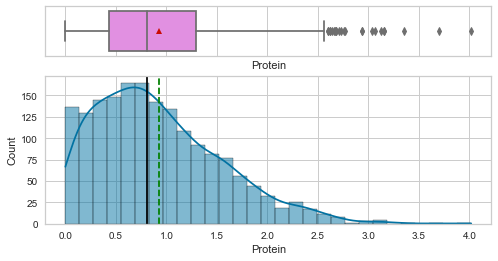

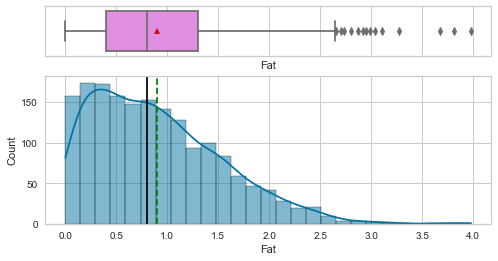

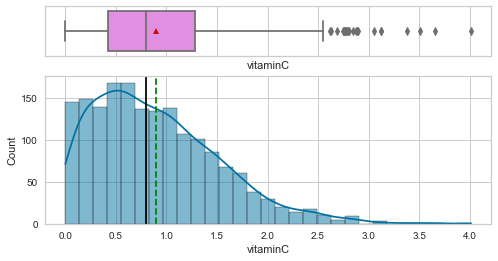

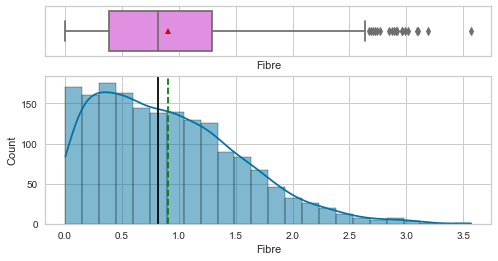

<IPython.core.display.Javascript object>

In [11]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item, kde=True, figsize=(8, 4))

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [13]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'Protein' are 

 [0.45236868 2.3210872  0.88455361 ... 0.5971295  0.74802556 2.01379933]
----------------------------------------------------------------------------------------------------
Unique values in the column 'Fat' are 

 [1.17092633 0.70685626 1.18657053 ... 0.72793444 1.7224059  0.576179  ]
----------------------------------------------------------------------------------------------------
Unique values in the column 'vitaminC' are 

 [1.07927082 0.35008841 2.42854436 ... 1.03158703 1.31992881 0.51599781]
----------------------------------------------------------------------------------------------------
Unique values in the column 'Fibre' are 

 [1.70296005 0.65824859 1.98456214 ... 0.25549611 0.92039147 1.53669414]
----------------------------------------------------------------------------------------------------
Unique values in the column 'Product' are 

 ['Amaranth leaves, cooked, boiled, drained, without salt'
 'Bacon and beef sticks'
 "App

<IPython.core.display.Javascript object>

In [14]:
for item in num_col:
    labeled_barplot(df, item, perc=True)

ValueError: Image size of 125784x360 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 125784x360 with 1 Axes>

ValueError: Image size of 125784x360 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 125784x360 with 1 Axes>

ValueError: Image size of 125784x360 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 125784x360 with 1 Axes>

ValueError: Image size of 125784x360 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 125784x360 with 1 Axes>

<IPython.core.display.Javascript object>

### Bivariate Analsysis

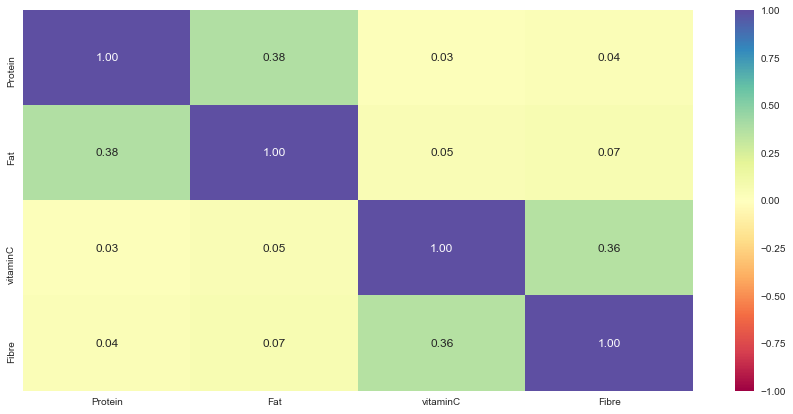

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

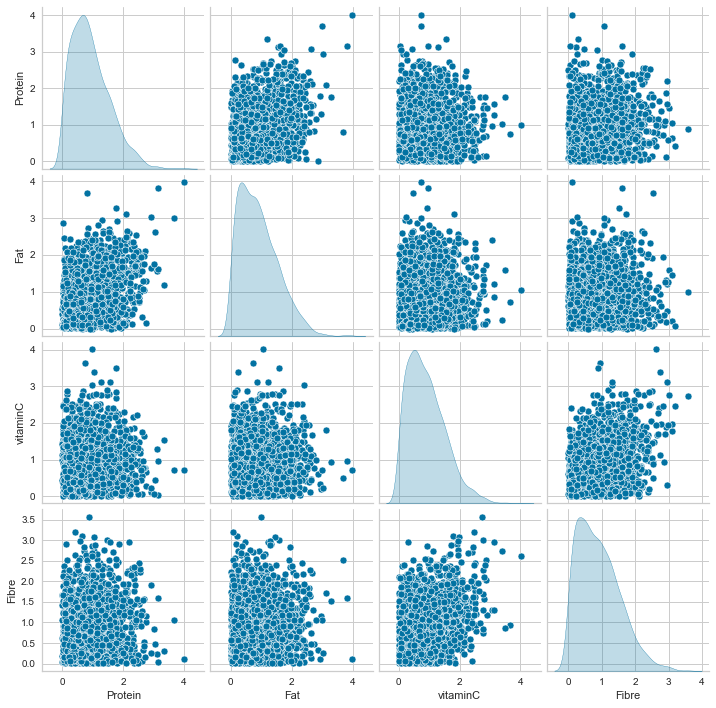

<IPython.core.display.Javascript object>

In [16]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

## K-means

In [17]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [18]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 1.8583720449271957
Number of Clusters: 2 	Average Distortion: 1.6124606178344718
Number of Clusters: 3 	Average Distortion: 1.4339822415575294
Number of Clusters: 4 	Average Distortion: 1.3596886101024
Number of Clusters: 5 	Average Distortion: 1.2907220206983379
Number of Clusters: 6 	Average Distortion: 1.2311846067859522
Number of Clusters: 7 	Average Distortion: 1.1808320614028183
Number of Clusters: 8 	Average Distortion: 1.1469310555336776
Number of Clusters: 9 	Average Distortion: 1.1122032123791101
Number of Clusters: 10 	Average Distortion: 1.086122022900126
Number of Clusters: 11 	Average Distortion: 1.0607162280968778
Number of Clusters: 12 	Average Distortion: 1.0392363173477137
Number of Clusters: 13 	Average Distortion: 1.0181074393986416
Number of Clusters: 14 	Average Distortion: 1.0003826661270565


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

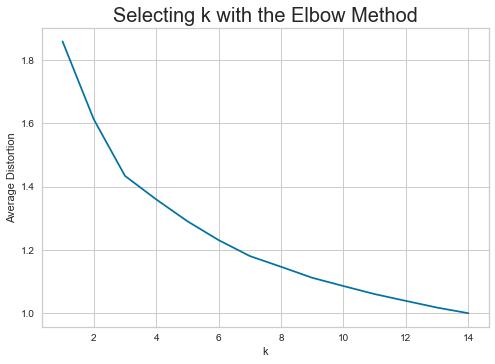

<IPython.core.display.Javascript object>

In [19]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**The appropriate value of k from the elbow curve seems to be 4 or 5.**

**Let's check the silhouette scores.**

For n_clusters = 2, silhouette score is 0.25496367847338175
For n_clusters = 3, silhouette score is 0.2527969479836892
For n_clusters = 4, silhouette score is 0.20387206756437265
For n_clusters = 5, silhouette score is 0.19641550352321682
For n_clusters = 6, silhouette score is 0.2071766029811893
For n_clusters = 7, silhouette score is 0.2085921459369246
For n_clusters = 8, silhouette score is 0.21147175048874547
For n_clusters = 9, silhouette score is 0.20881351387696154
For n_clusters = 10, silhouette score is 0.20432175674811287
For n_clusters = 11, silhouette score is 0.20099656709375582
For n_clusters = 12, silhouette score is 0.1978358454698437
For n_clusters = 13, silhouette score is 0.1963339410586342
For n_clusters = 14, silhouette score is 0.19058991022914962


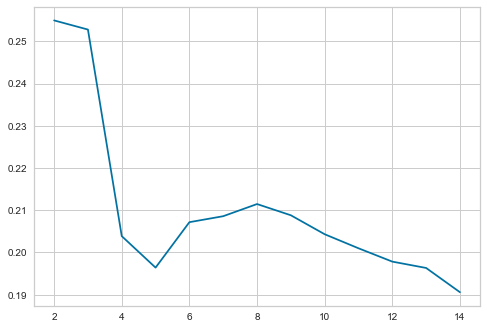

<IPython.core.display.Javascript object>

In [20]:
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

Number of Clusters: 1 	Average Distortion: 1.8583720449271957
Number of Clusters: 2 	Average Distortion: 1.6124606178344718
Number of Clusters: 3 	Average Distortion: 1.4342071603373008
Number of Clusters: 4 	Average Distortion: 1.3600718086857317
Number of Clusters: 5 	Average Distortion: 1.2917884110651359
Number of Clusters: 6 	Average Distortion: 1.231230559644666
Number of Clusters: 7 	Average Distortion: 1.1817865200448265
Number of Clusters: 8 	Average Distortion: 1.1462975605509398
Number of Clusters: 9 	Average Distortion: 1.1156896736383157
Number of Clusters: 10 	Average Distortion: 1.0889552325938823
Number of Clusters: 11 	Average Distortion: 1.060442819871638
Number of Clusters: 12 	Average Distortion: 1.0411801445239004


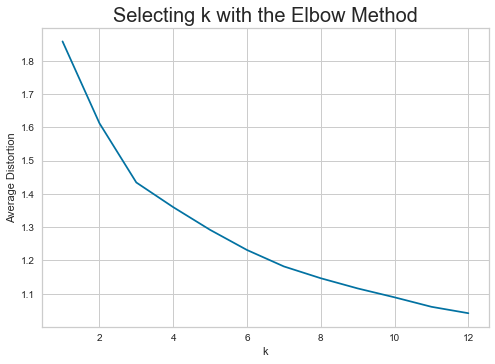

<IPython.core.display.Javascript object>

In [21]:
# creating a copy of the scaled dataframe

k_means_df = subset_scaled_df.copy()


# elbow plot

clusters = range(1, 13)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**From the silhouette scores, it seems that 7 is a good value of k.**

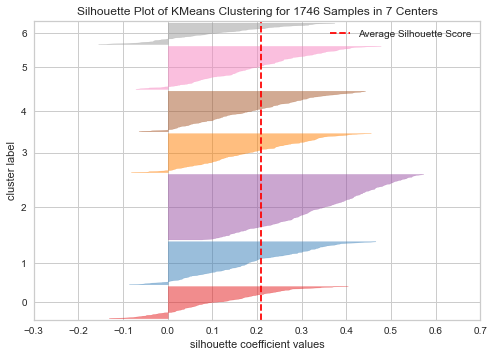

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1746 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [22]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

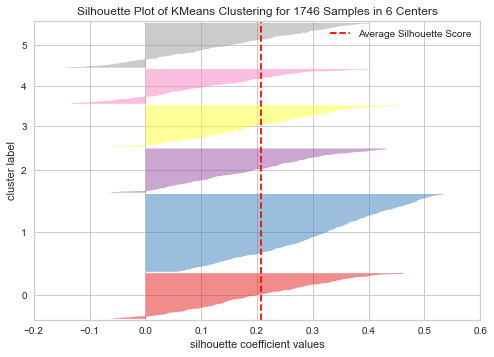

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1746 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [23]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

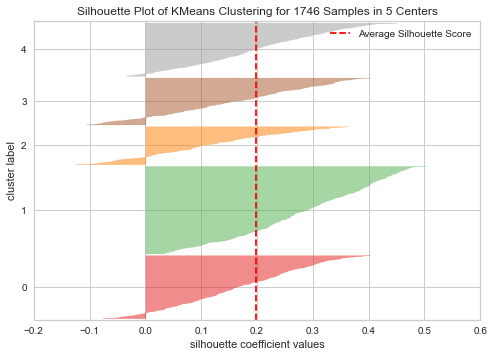

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1746 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [24]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

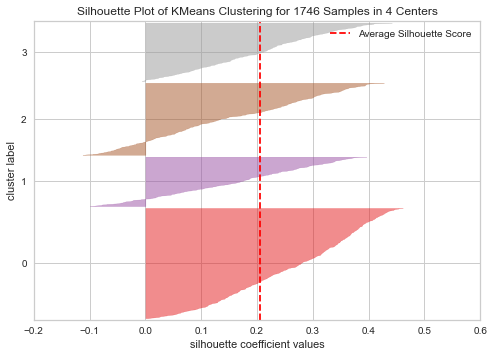

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1746 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [25]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

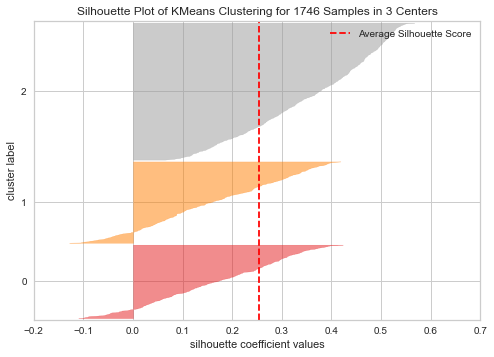

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1746 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [26]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [27]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=1)

<IPython.core.display.Javascript object>

In [28]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [29]:
cluster_profile = df.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [30]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Fat"].count().values
)

<IPython.core.display.Javascript object>

In [31]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Protein,Fat,vitaminC,Fibre,count_in_each_segment
K_means_segments,,,,,
0,0.768839,0.804329,1.558258,1.549467,440
1,1.552066,1.556525,0.791801,0.824236,487
2,0.630631,0.561205,0.611007,0.597900,819


<IPython.core.display.Javascript object>

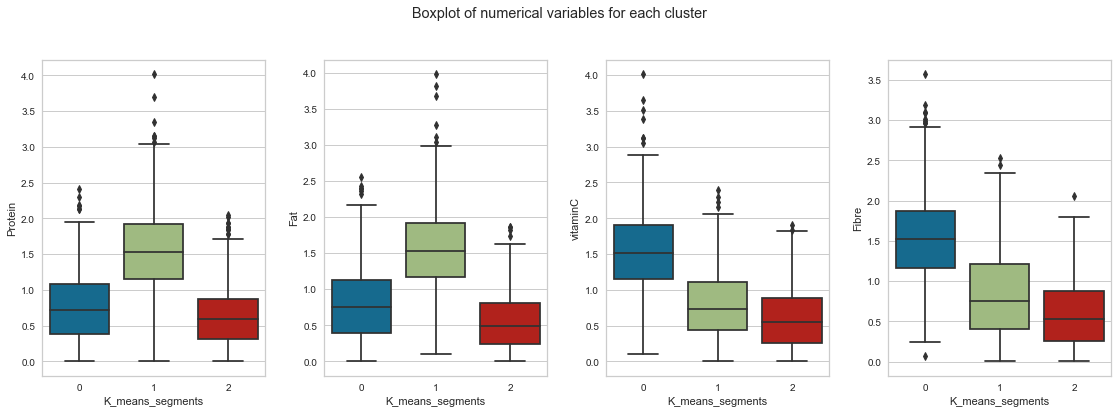

<IPython.core.display.Javascript object>

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(4):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

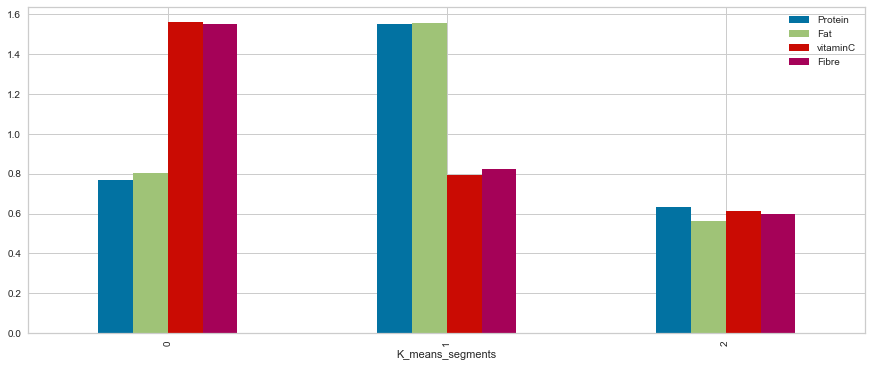

<IPython.core.display.Javascript object>

In [33]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

## Hierarchical Clustering and PCA

In [34]:
# copying the data to another variable to avoid any changes to original data
df1 = df.copy()
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df1.drop(["Product"], axis=1)),
    columns=df1.drop(["Product"], axis=1).columns,
)
subset_scaled_df.head()

,Protein,Fat,vitaminC,Fibre,K_means_segments
0,-0.749825,0.426892,0.287212,1.279936,-1.482512
1,2.230835,-0.304578,-0.881972,-0.387079,-0.264410
2,-0.060478,0.451551,2.450659,1.729280,-1.482512
3,-0.330121,-0.508314,-1.008903,-0.848201,0.953691
4,-1.259850,-0.560451,-1.255896,-0.548145,0.953691


<IPython.core.display.Javascript object>

In [35]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7239870456258563.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6212680704646649.
Cophenetic correlation for Euclidean distance and average linkage is 0.7593512702110484.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6153962470443584.
Cophenetic correlation for Chebyshev distance and single linkage is 0.6960493121508002.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.607279913913264.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7556679591118888.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.6857556704402785.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7391551615133051.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5041388663174563.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7195098520731336.
Cophenetic cor

<IPython.core.display.Javascript object>

In [36]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7593512702110484, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Chebyshev distance only.**

In [37]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7239870456258563.
Cophenetic correlation for complete linkage is 0.6212680704646649.
Cophenetic correlation for average linkage is 0.7593512702110484.
Cophenetic correlation for centroid linkage is 0.7425173495667996.
Cophenetic correlation for ward linkage is 0.6449743548938132.
Cophenetic correlation for weighted linkage is 0.6153962470443584.


<IPython.core.display.Javascript object>

In [38]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7593512702110484, which is obtained with average linkage.


<IPython.core.display.Javascript object>

In [39]:
hc_df = subset_scaled_df.copy()


# list of distance metrics
distance_metrics = ["euclidean"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted", "ward", "centroid"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
if high_cophenet_corr < c:
    high_cophenet_corr = c
    high_dm_lm[0] = dm
    high_dm_lm[1] = lm

    # printing the combination of distance metric and linkage method with the highest cophenetic correlation
    print("*" * 120)
    print(
        "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
            high_cophenet_corr, high_dm_lm[1]
        )
    )

Cophenetic correlation for Euclidean distance and single linkage is 0.7239870456258563.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6212680704646649.
Cophenetic correlation for Euclidean distance and average linkage is 0.7593512702110484.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6153962470443584.
Cophenetic correlation for Euclidean distance and ward linkage is 0.6449743548938132.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.7425173495667996.
************************************************************************************************************************
Highest cophenetic correlation is 0.7425173495667996, which is obtained with centroid linkage.


<IPython.core.display.Javascript object>

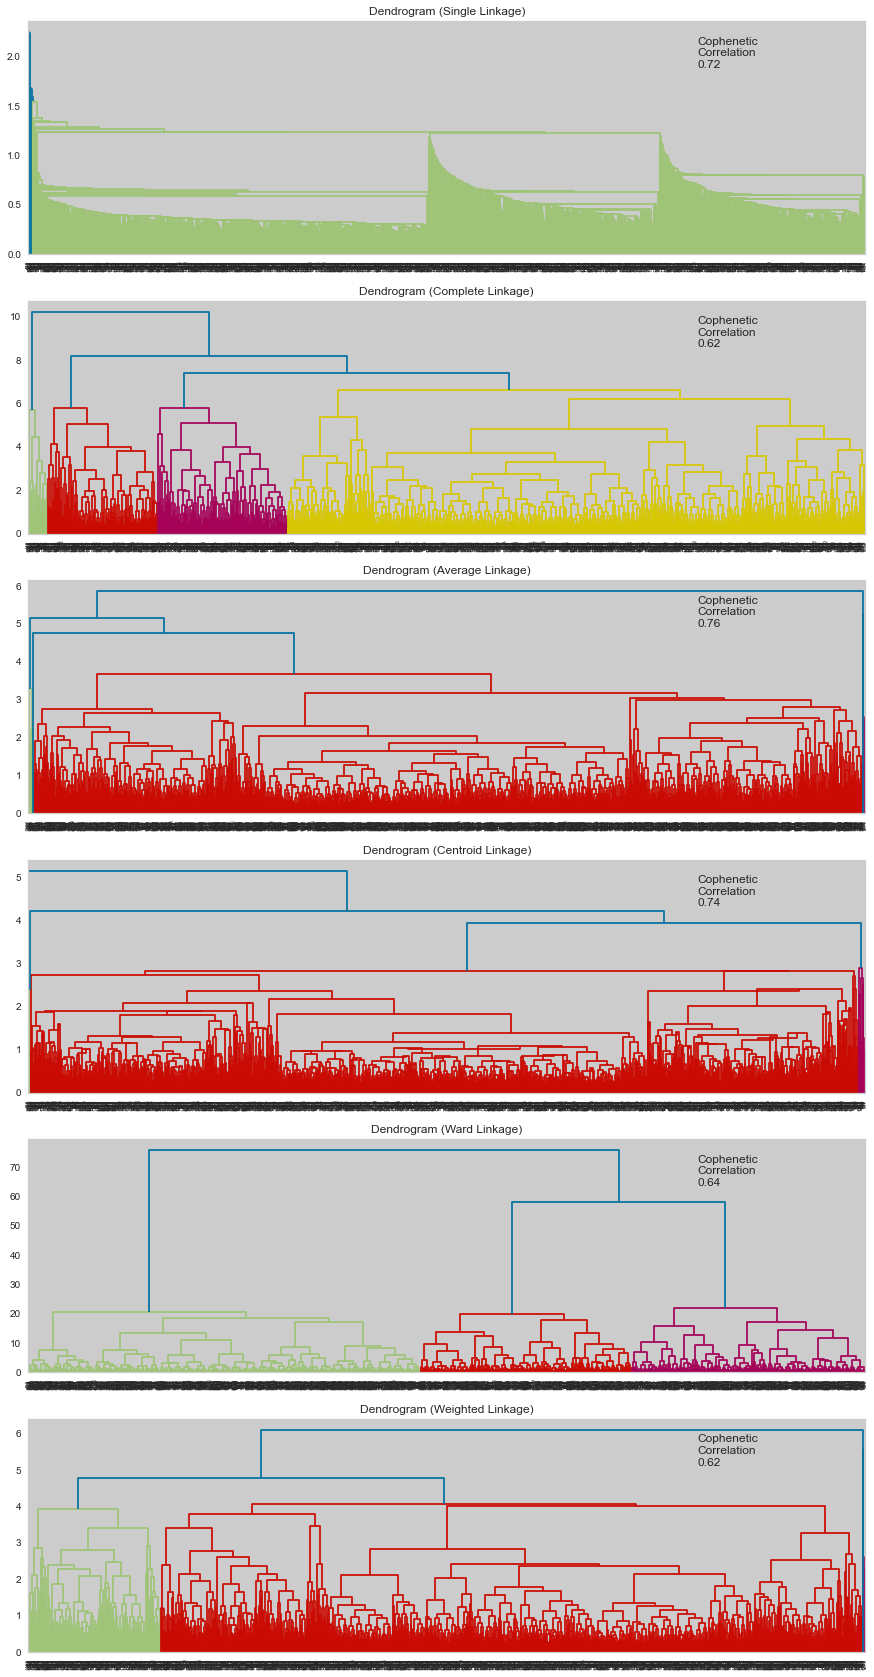

<IPython.core.display.Javascript object>

In [40]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

In [41]:
HCmodel = AgglomerativeClustering(
    n_clusters=6, affinity="euclidean", linkage="complete"
)
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='complete', n_clusters=6)

<IPython.core.display.Javascript object>

In [42]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [43]:
cluster_profile = df1.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [44]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Product"].count().values
)

<IPython.core.display.Javascript object>

In [45]:
# let's see the names of the countries in each cluster
for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["Product"].unique())
    print()

In cluster 2, the following countries are present:
['Amaranth leaves, cooked, boiled, drained, without salt'
 'Apples, raw, without skin' 'Barbecue loaf, pork, beef'
 'Applesauce, canned, sweetened, without salt'
 'Apricots, canned, heavy syrup pack, with skin, solids and liquids'
 'Alcoholic Beverage, wine, table, red, Cabernet Sauvignon'
 'Apricots, dehydrated (low-moisture), sulfured, uncooked'
 'Apricots, dried, sulfured, stewed, without added sugar'
 'Arrowhead, cooked, boiled, drained, without salt' 'Arugula, raw'
 'Asparagus, canned, drained solids'
 'Beef, loin, top loin, separable lean and fat, trimmed to 1/8" fat, select, raw'
 'Balsam-pear (bitter gourd), pods, raw' 'Barley flour or meal'
 'Beef, rib, small end (ribs 10-12), separable lean and fat, trimmed to 1/8" fat, choice, cooked, roasted'
 'Beans, baked, canned, with pork'
 'Beef, round, top round, separable lean and fat, trimmed to 1/8" fat, select, cooked, braised'
 'Beans, kidney, mature seeds, sprouted, raw'
 'Beef,

<IPython.core.display.Javascript object>

In [46]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=3)

<IPython.core.display.Javascript object>

In [47]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [48]:
cluster_profile = df1.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [49]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Product"].count().values
)

<IPython.core.display.Javascript object>

In [50]:
# let's see the names of the countries in each cluster
for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["Product"].unique())
    print()

In cluster 2, the following countries are present:
['Amaranth leaves, cooked, boiled, drained, without salt'
 "Apples, frozen, unsweetened, unheated (Includes foods for USDA's Food Distribution Program)"
 'Apples, raw, without skin' 'Applesauce, canned, sweetened, without salt'
 'Apricots, canned, heavy syrup pack, with skin, solids and liquids'
 'Apricots, canned, heavy syrup, drained'
 'Apricots, dehydrated (low-moisture), sulfured, uncooked'
 'Apricots, dried, sulfured, stewed, without added sugar'
 'Arrowhead, cooked, boiled, drained, without salt' 'Arugula, raw'
 'Asparagus, canned, drained solids'
 'Asparagus, canned, regular pack, solids and liquids'
 'Asparagus, cooked, boiled, drained'
 'Asparagus, frozen, cooked, boiled, drained, without salt'
 'Balsam-pear (bitter gourd), pods, raw' 'Bamboo shoots, raw'
 'Barley flour or meal' 'Beans, adzuki, mature seeds, raw'
 'Beans, baked, canned, with pork'
 'Beans, black turtle, mature seeds, canned'
 'Beans, black turtle, mature seeds

<IPython.core.display.Javascript object>

In [51]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Protein,Fat,vitaminC,Fibre,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,
0,1.501233,1.564077,0.791632,0.855768,0.976143,503
1,0.652625,0.554191,0.628837,0.594639,1.980606,825
2,0.758604,0.783780,1.566205,1.559377,0.000000,418


<IPython.core.display.Javascript object>

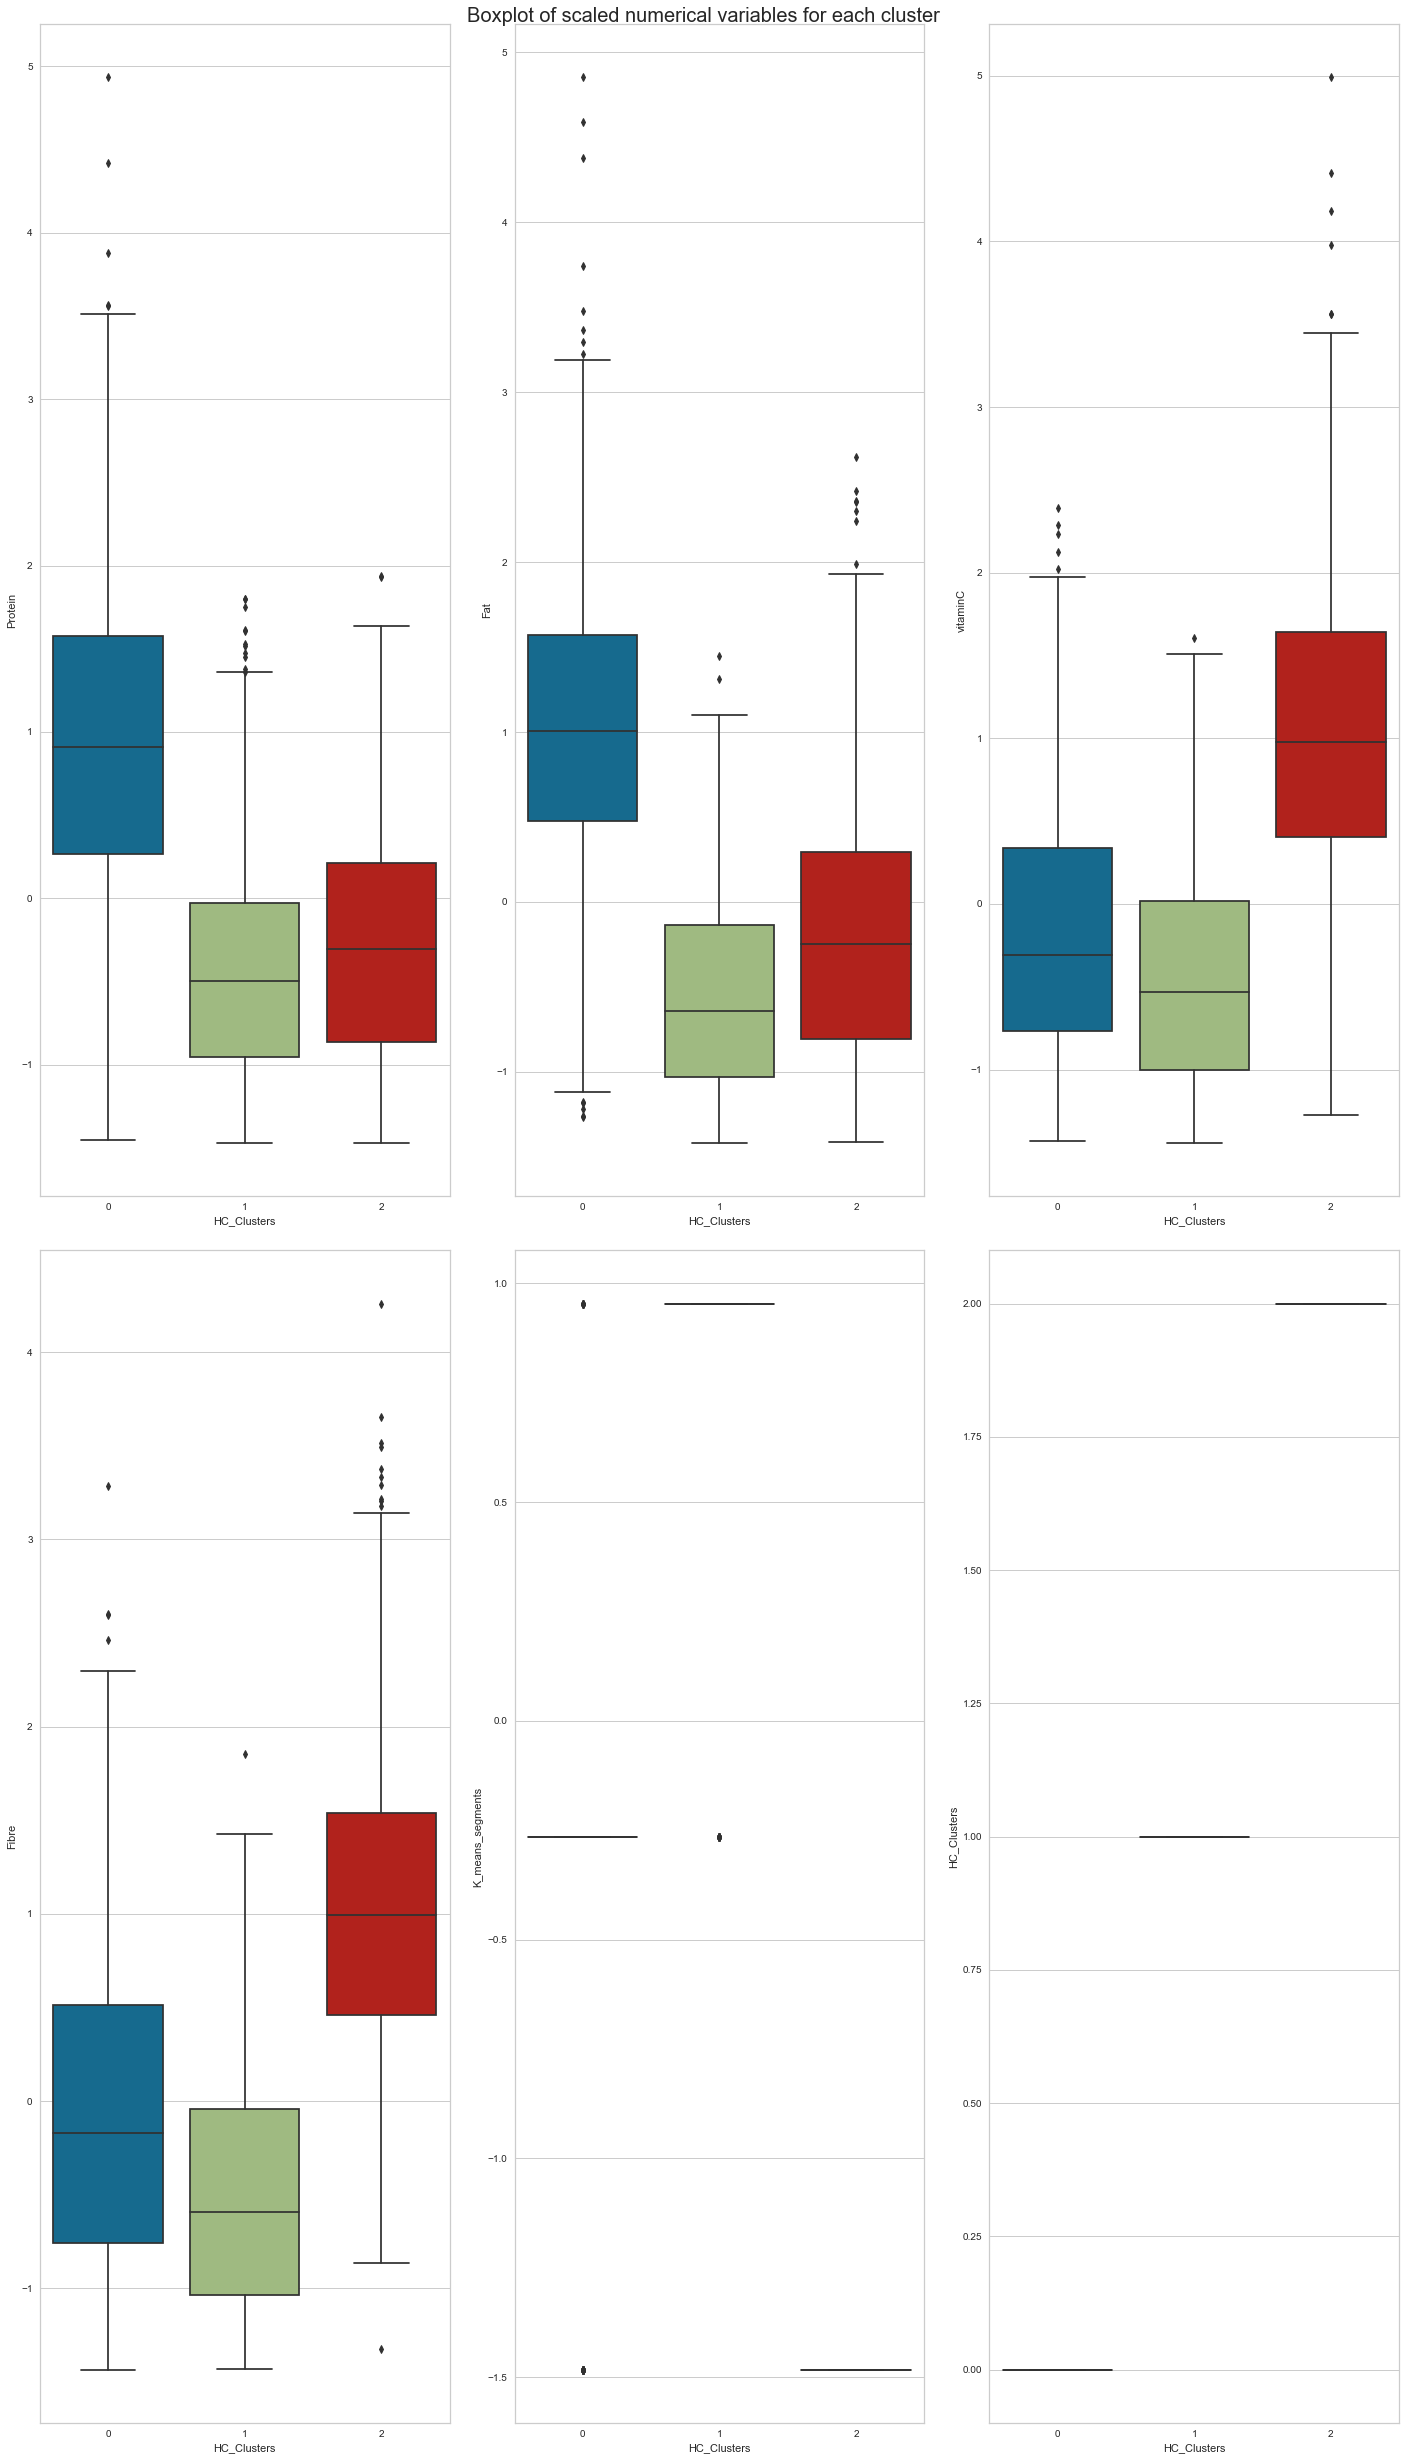

<IPython.core.display.Javascript object>

In [52]:
# selecting numerical columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(2, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(2):
    sns.boxplot(
        ax=axes[ii][0],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1


fig.tight_layout(pad=2.0)

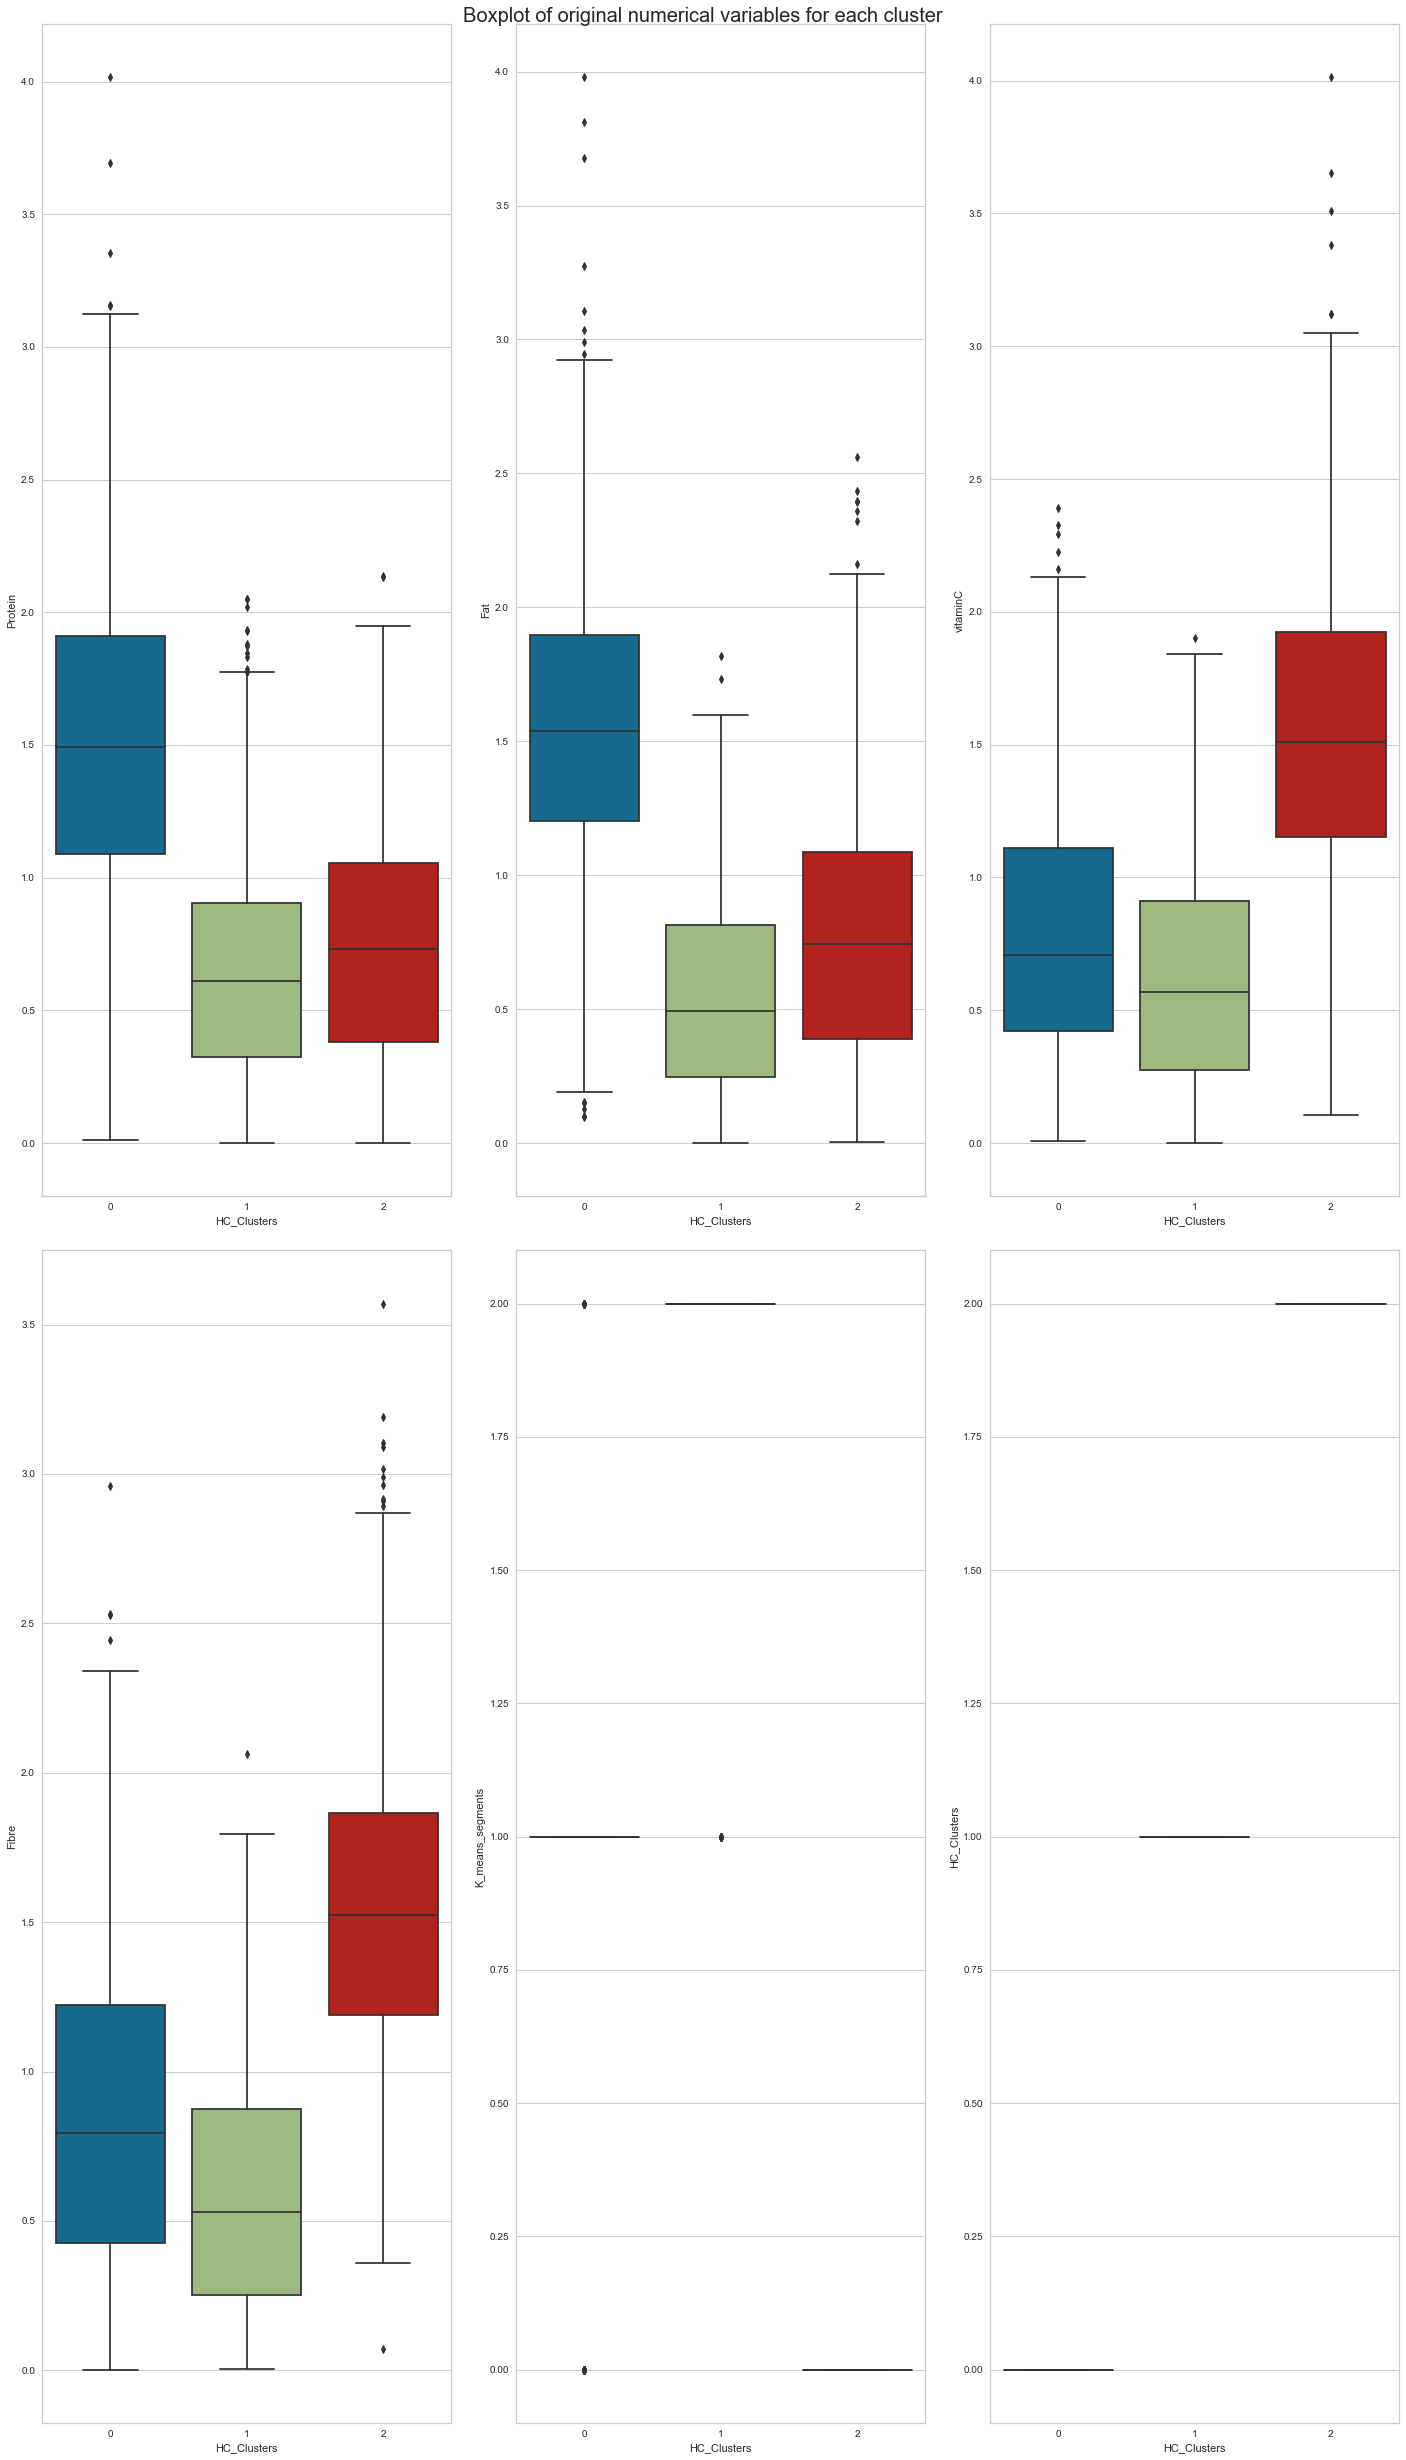

<IPython.core.display.Javascript object>

In [53]:
fig, axes = plt.subplots(2, 3, figsize=(20, 35))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(2):
    sns.boxplot(ax=axes[ii][0], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][1], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][2], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1


fig.tight_layout(pad=2.0)